In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
param = np.array(pd.read_csv("rHeston_data_no_h.csv"))
err = np.array(pd.read_csv("grid_error_no_h.csv")).flatten()

Text(0, 0.5, '$\\theta$')

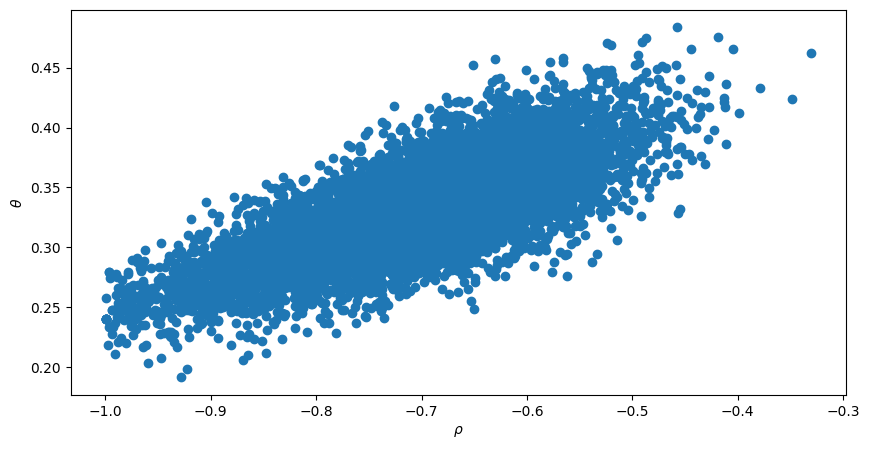

In [3]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(10)

plt.scatter(param[:,0], param[:,1])
plt.xlabel(r"$\rho$")
plt.ylabel(r"$\theta$")

In [4]:
n_bins = 400; N = len(err);
hist, bined = np.histogramdd(param, bins = n_bins)
hist /= N

In [5]:
index = np.zeros([N,3], dtype = int)
w = np.zeros(N)
for j in range(N):
    for i in range(n_bins):
        if param[j,0] >= bined[0][i] and param[j,0] <= bined[0][i+1]:
            index[j,0] = i
        if param[j,1] >= bined[1][i] and param[j,1] <= bined[1][i+1]:
            index[j,1] = i
    w[j] = hist[index[j,0]][index[j,1]]

In [6]:
w_err = np.matmul(err, w)
w_err

4.805355636512498

In [7]:
err.mean()

3.861477362386746

In [8]:
np.matmul((err-w_err)**2, w)

6.988050723924655

In [9]:
w_err - err.mean()

0.9438782741257521

<IPython.core.display.Javascript object>


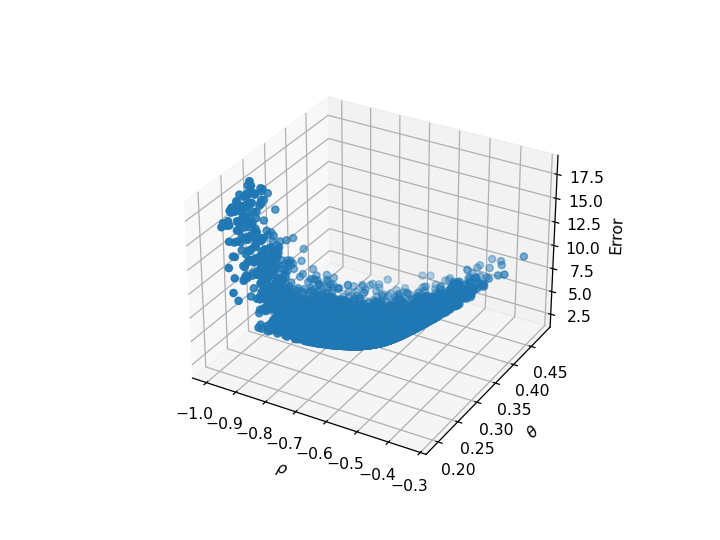

In [10]:
%matplotlib notebook
fig = plt.figure()

ax = fig.add_subplot(projection='3d')
ax.scatter(param[:,0], param[:,1], err, marker='o')

ax.set_xlabel(r"$\rho$")
ax.set_ylabel(r"$\theta$")
ax.set_zlabel("Error")

plt.show()